<a href="https://colab.research.google.com/github/houssinekhlif/Project-1/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded=files.upload()

Saving Titanic-Dataset (1).csv to Titanic-Dataset (1) (1).csv


In [71]:
df_titanic=pd.read_csv("Titanic-Dataset.csv")

In [72]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df_titanic.shape)
df_titanic.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


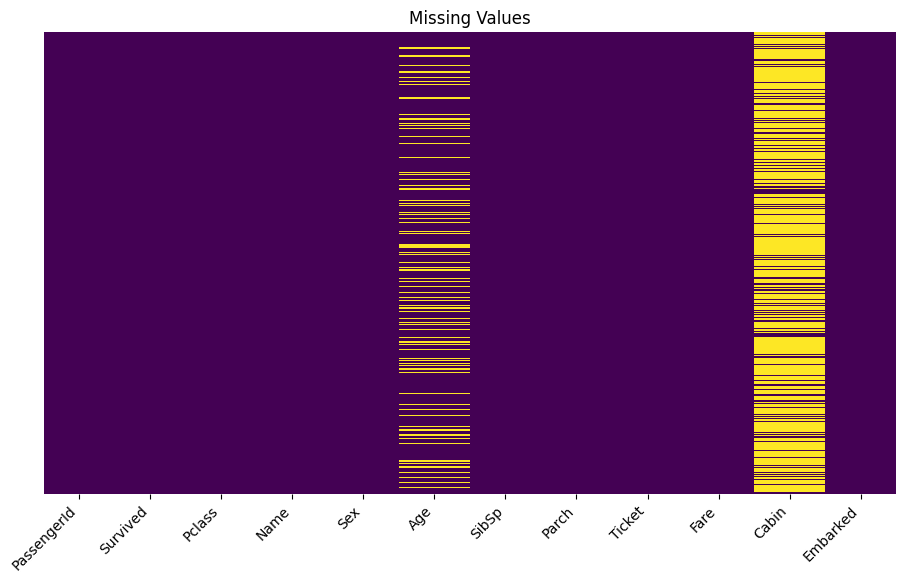

In [13]:
plt.figure(figsize=(11,6))
sns.heatmap(data=df_titanic.isnull(),cmap="viridis",cbar=False,yticklabels=False)
plt.xticks(rotation=45,ha='right')
plt.title("Missing Values")
plt.show()

In [35]:
cabin_count=df_titanic.Cabin.value_counts()
print(f"{len(df_titanic.Cabin.unique())} unique cabin values.")
cabin_count

148 unique cabin values.


,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [73]:
df_cleaned=df_titanic.copy()
df_cleaned["Deck"]=df_cleaned["Cabin"].astype("str").str[0]
df_cleaned["Deck"]=df_cleaned["Deck"].replace("n","Unknown")
df_cleaned.drop(columns=["Cabin"],inplace=True)
df_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown


In [75]:
# Function to calculate bin count dynamically
def calculate_bins(data):
    # Drop NaN values from the column
    clean_data = data.dropna()

    # Square Root Rule
    square_root_bins = int(np.sqrt(len(clean_data)))

    # Sturges' Rule
    sturges_bins = int(1 + np.log2(len(clean_data)))

    # Freedman-Diaconis Rule
    iqr = clean_data.quantile(0.75) - clean_data.quantile(0.25)
    bin_width_fd = 2 * iqr / (len(clean_data) ** (1 / 3))
    fd_bins = int((clean_data.max() - clean_data.min()) / bin_width_fd)

    return {
        "Square Root Rule": square_root_bins,
        "Sturges' Rule": sturges_bins,
        "Freedman-Diaconis Rule": fd_bins
    }

In [76]:
# Apply the function to Age column
bin_counts = calculate_bins(df_cleaned['Age'])
print("Optimal Bin Counts:", bin_counts)

Optimal Bin Counts: {'Square Root Rule': 26, "Sturges' Rule": 10, 'Freedman-Diaconis Rule': 19}


In [79]:
def distribution(data, bins, column):
  # Visualize the distribution of Purchase_Amount
  plt.figure(figsize=(10, 6))

  # Histogram
  sns.histplot(data=data,x=column, kde=True, bins=bins, color='blue')

  # Add titles and labels
  plt.title(f"Distribution of {column}")
  plt.xlabel(column, fontsize=12)
  plt.ylabel("Frequency", fontsize=12)

  # Show the plot
  plt.show()

  skewness = data[column].skew()
  print(f"Skewness of {column}: {skewness}")

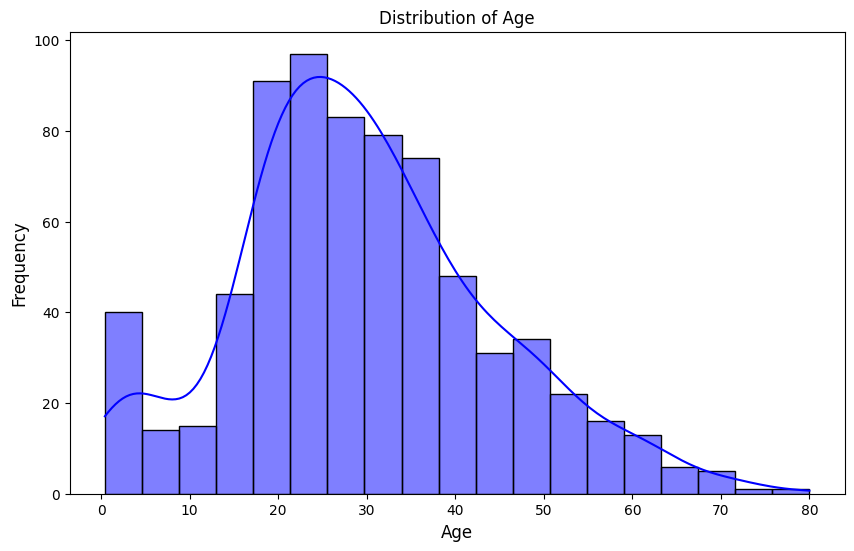

Skewness of Age: 0.38910778230082704


In [83]:
distribution(df_cleaned,19,"Age")

In [84]:
df_cleaned["Age"]=df_cleaned["Age"].fillna(df_cleaned["Age"].median())
df_cleaned["Age"].isnull().sum()

np.int64(0)

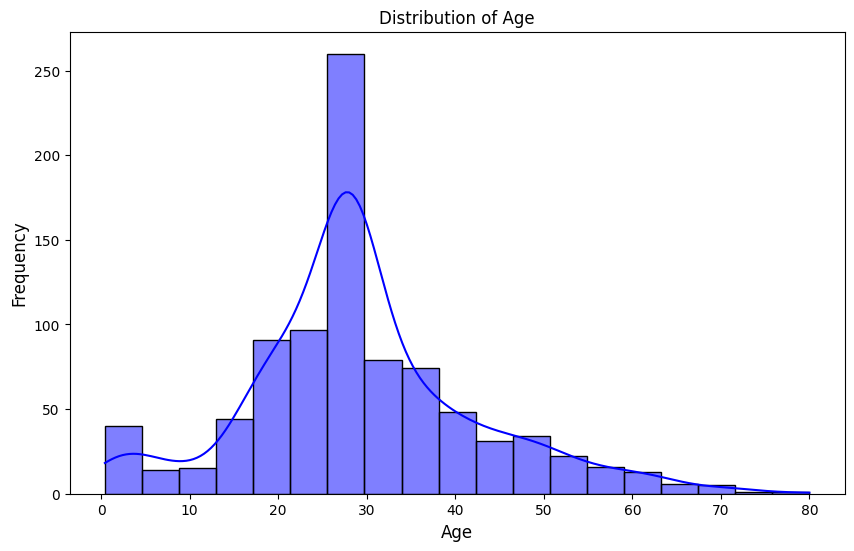

Skewness of Age: 0.5102446555756495


In [85]:
distribution(df_cleaned,19,"Age")

In [137]:
df_cleaned.drop(columns=["Name","Ticket","PassengerId"],inplace=True)

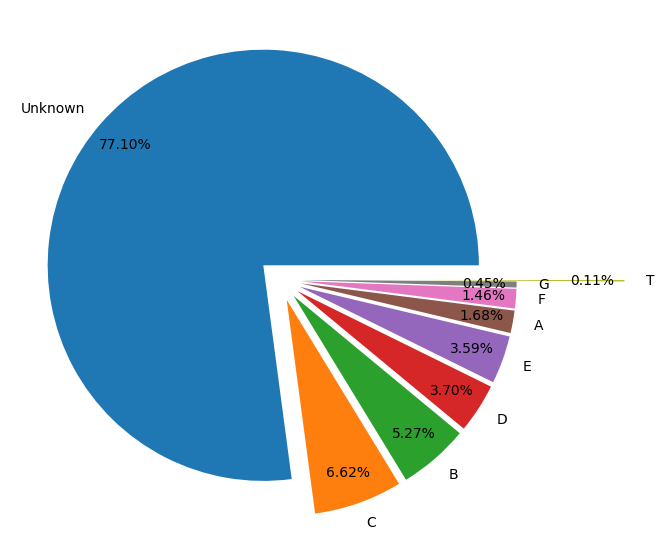

In [112]:
deck_count=df_cleaned.Deck.value_counts()
plt.figure(figsize=(7,7))
plt.pie(deck_count,labels=deck_count.index,autopct="%.2f%%",explode=[0.1]*8 + [0.6],labeldistance=1.1,pctdistance=.85)
plt.show()

<ipython-input-162-5cdc3df00c0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned,x="Survived",y="Fare",palette=["red","green"])


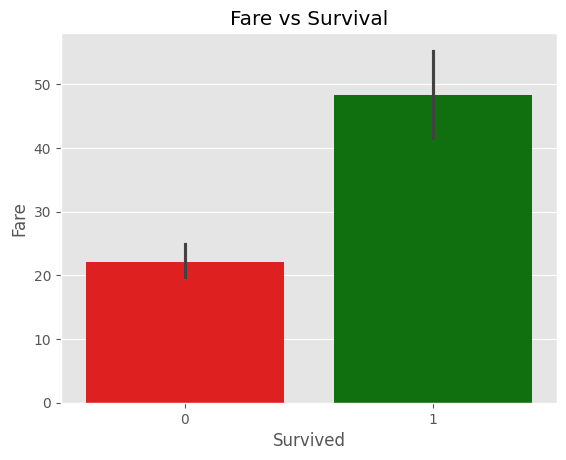

In [162]:
plt.style.use("ggplot")
sns.barplot(data=df_cleaned,x="Survived",y="Fare",palette=["red","green"])
plt.title("Fare vs Survival")
plt.show()

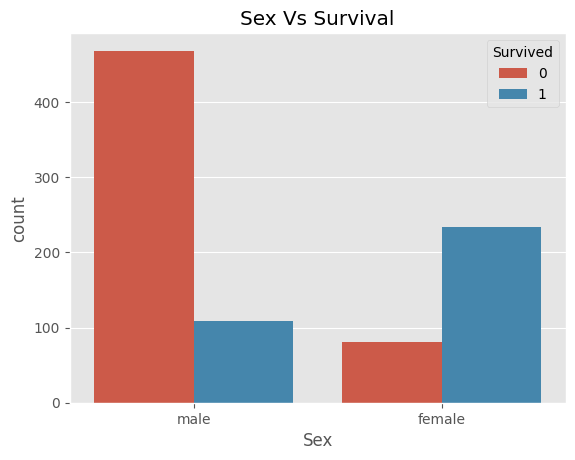

In [164]:
sns.countplot(data=df_cleaned,x="Sex",hue="Survived")
plt.title("Sex Vs Survival")
plt.show()

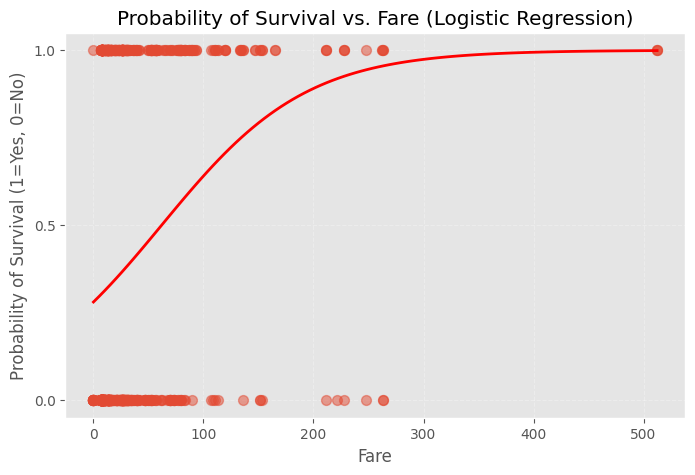

In [171]:

plt.figure(figsize=(8, 5))
sns.regplot(data=df_cleaned,x="Fare",y="Survived",logistic=True,ci=None,scatter_kws={'s': 50, 'alpha': 0.5},line_kws={'color': 'red', 'lw': 2}
)

plt.title("Probability of Survival vs. Fare (Logistic Regression)")
plt.xlabel("Fare")
plt.ylabel("Probability of Survival (1=Yes, 0=No)")
plt.yticks([0, 0.5, 1])  # Ensures y-axis shows probabilities
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

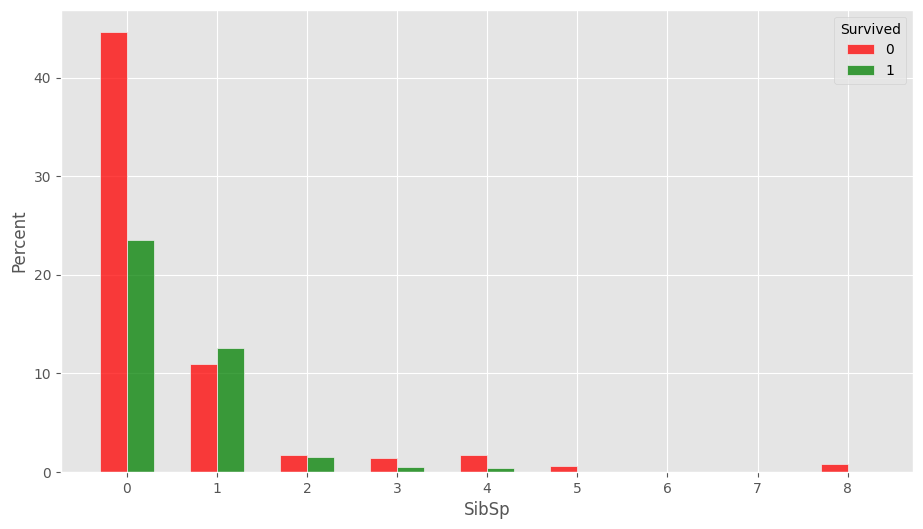

In [203]:
plt.figure(figsize=(11,6))
sns.histplot(data=df_cleaned,x="SibSp",hue="Survived",multiple="dodge",shrink=0.6,stat="percent",palette=["r","g"],discrete=True,bins=1)
plt.xticks(np.arange(9))
plt.show()

In [199]:
df_cleaned["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='Parch', ylabel='Percent'>

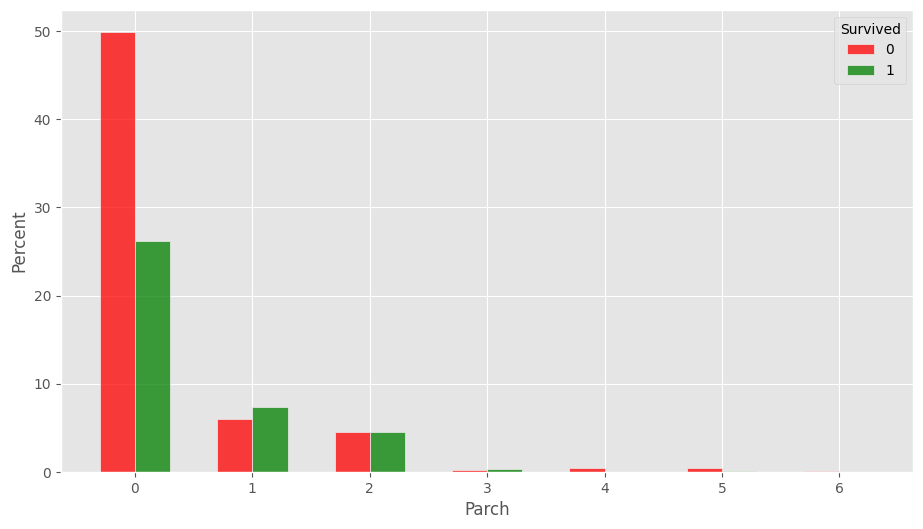

In [192]:
plt.figure(figsize=(11,6))
sns.histplot(data=df_cleaned,x="Parch",hue="Survived",multiple="dodge",shrink=0.6,stat="percent",palette=["r","g"],discrete=True)

<Axes: xlabel='SibSp', ylabel='percent'>

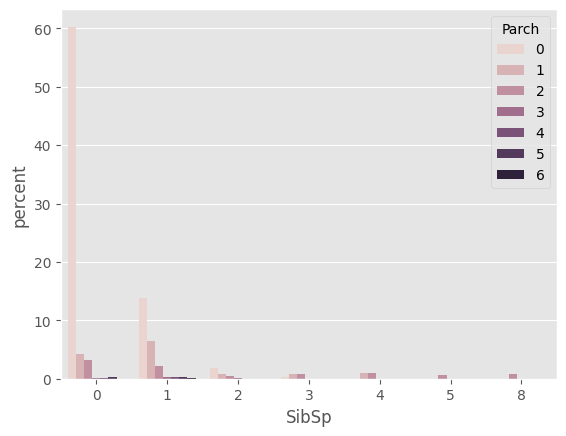

In [206]:
sns.countplot(data=df_cleaned,x="SibSp",hue="Parch",stat="percent")

In [122]:
df_cleaned.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


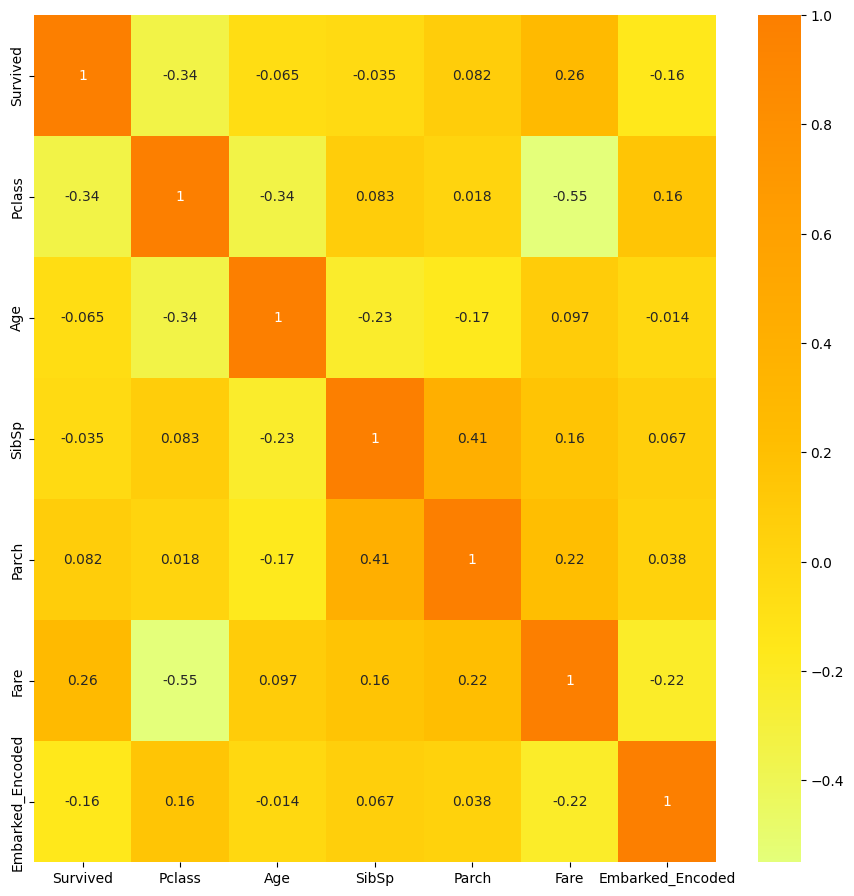

In [142]:
from sklearn.preprocessing import LabelEncoder

df_corr=df_cleaned.copy()
label_encoder=LabelEncoder()
df_corr["Embarked_Encoded"]=label_encoder.fit_transform(df_corr["Embarked"])

plt.figure(figsize=(11,11))
sns.heatmap(data=df_corr.select_dtypes(include=["number"]).corr(),cmap="Wistia",annot=True)
plt.show()

In [208]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Deck      891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# **Building Predictive Model (Logistic Regression)**

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Load the df_cleaned dataset
X =df_cleaned[["Age","Pclass","SibSp","Parch","Fare","Sex","Deck","Embarked"]]
y =df_cleaned["Survived"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)


C=[0.001, 0.01, 0.1, 1, 10, 100]
for A in C:
  # Create the logistic regression model
  model = LogisticRegression(max_iter=200,C=A,solver="liblinear")

  # Train the model on the training data
  model.fit(X_train, y_train)

  # Make predictions on the testing data
  y_pred = model.predict(X_test)

  # Evaluate the model performance using accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy*100:.4f}%")



Model Accuracy: 79.8883%
Model Accuracy: 79.3296%
Model Accuracy: 78.2123%
Model Accuracy: 81.0056%
Model Accuracy: 81.0056%
Model Accuracy: 81.0056%
